In [46]:
import streamlit as st
import json
import random
import os
import numpy as np

In [2]:
# Load the tarot card data from the JSON file
file_path='tarot-images.json'

In [4]:
def load_tarot_data(json_file_path):
    with open(json_file_path, 'r') as file:
        return json.load(file)

def get_random_card(tarot_cards):
    return random.choice(tarot_cards)

In [15]:
# Load tarot data
tarot_cards_json = load_tarot_data(file_path)

In [16]:
type(tarot_cards_json)

dict

In [19]:
tarot_cards_json.keys()

dict_keys(['description', 'cards'])

In [20]:
# we only need this cards as list
tarot_cards = tarot_cards_json['cards']

In [21]:
type(tarot_cards)

list

In [30]:
# so it is like we have a list of dictionaries
type(tarot_cards[0])

dict

In [28]:
# we want to check the structure of tarot card
tarot_cards[0]

{'name': 'The Fool',
 'number': '0',
 'arcana': 'Major Arcana',
 'suit': 'Trump',
 'img': 'm00.jpg',
 'fortune_telling': ['Watch for new projects and new beginnings',
  'Prepare to take something on faith',
  'Something new comes your way; go for it'],
 'keywords': ['freedom', 'faith', 'inexperience', 'innocence'],
 'meanings': {'light': ['Freeing yourself from limitation',
   'Expressing joy and youthful vigor',
   'Being open-minded',
   'Taking a leap of faith',
   'Attuning yourself to your instincts',
   'Being eager or curious',
   'Exploring your potential',
   'Embracing innovation and change'],
  'shadow': ['Being gullible and naive',
   'Taking unnecessary risks',
   'Failing to be serious when required',
   'Being silly or distracted',
   'Lacking experience',
   'Failing to honor well-established traditions and limits',
   'Behaving inappropriately']},
 'Archetype': 'The Divine Madman',
 'Hebrew Alphabet': 'Aleph/Ox/1',
 'Numerology': '0 (off the scale; pure potential)',
 '

In [31]:
def extract_card_details(card_dict):
    # Extracting all known fields from the card
    card_details = {
        'Name': card_dict['name'],
        'Number': card_dict['number'],
        'Arcana': card_dict['arcana'],
        'Suit': card_dict['suit'],
        'Image': card_dict['img'],
        'Fortune Telling': card_dict['fortune_telling'],
        'Keywords': card_dict['keywords'],
        'Meanings Light': card_dict['meanings']['light'],
        'Meanings Shadow': card_dict['meanings']['shadow'],
        'Archetype': card_dict.get('Archetype', 'N/A'),  # Using .get() for optional fields
        'Hebrew Alphabet': card_dict.get('Hebrew Alphabet', 'N/A'),
        'Numerology': card_dict.get('Numerology', 'N/A'),
        'Elemental': card_dict.get('Elemental', 'N/A'),
        'Mythical/Spiritual': card_dict.get('Mythical/Spiritual', 'N/A'),
        'Questions to Ask': card_dict.get('Questions to Ask', [])
    }
    
    # Handling list fields to convert them into string for easier display/storage
    for key in ['Fortune Telling', 'Keywords', 'Meanings Light', 'Meanings Shadow', 'Questions to Ask']:
        if isinstance(card_details[key], list):
            card_details[key] = '; '.join(card_details[key])
    
    return card_details

In [32]:
# Extract information for each card
extracted_details = [extract_card_details(card) for card in tarot_cards]

In [35]:
import pandas as pd

# Convert the extracted details into a DataFrame
cards_df = pd.DataFrame(extracted_details)

# Display the DataFrame to verify its structure and contents
cards_df.columns


Index(['Name', 'Number', 'Arcana', 'Suit', 'Image', 'Fortune Telling',
       'Keywords', 'Meanings Light', 'Meanings Shadow', 'Archetype',
       'Hebrew Alphabet', 'Numerology', 'Elemental', 'Mythical/Spiritual',
       'Questions to Ask'],
      dtype='object')

In [37]:
# then we check the data extraction 

cards_df.isnull().sum()

Name                  0
Number                0
Arcana                0
Suit                  0
Image                 0
Fortune Telling       0
Keywords              0
Meanings Light        0
Meanings Shadow       0
Archetype             0
Hebrew Alphabet       0
Numerology            0
Elemental             0
Mythical/Spiritual    0
Questions to Ask      0
dtype: int64

In [43]:
# Create a boolean DataFrame indicating where values are "N/A"
is_na = cards_df.apply(lambda x: x == 'N/A')

# Identify columns that contain at least one "N/A"
columns_with_na = is_na.sum()

columns_with_na


Name                   0
Number                 0
Arcana                 0
Suit                   0
Image                  0
Fortune Telling        0
Keywords               0
Meanings Light         0
Meanings Shadow        0
Archetype             56
Hebrew Alphabet       56
Numerology            16
Elemental             40
Mythical/Spiritual    56
Questions to Ask       0
dtype: int64

In [45]:
cards_df.shape


(78, 15)

In [57]:
# Replace "N/A" with np.nan
cleaned_df=cards_df.replace('N/A', np.nan)

In [59]:
# check if the dataframe has been cleaned
# If we want to have a clean dataframe, we shuld only keep the columns that have no N/A values
cleaned_df.dropna(axis=1,inplace=True)


In [61]:
# The cleaned df is to create a recommendatiopn system based on the similarity between cards
cleaned_df.isnull().sum()

Name                0
Number              0
Arcana              0
Suit                0
Image               0
Fortune Telling     0
Keywords            0
Meanings Light      0
Meanings Shadow     0
Questions to Ask    0
dtype: int64

In [82]:
cleaned_df

,Name,Number,Arcana,Suit,Image,Fortune Telling,Keywords,Meanings Light,Meanings Shadow,Questions to Ask
0,The Fool,0,Major Arcana,Trump,m00.jpg,Watch for new projects and new beginnings; Pre...,freedom; faith; inexperience; innocence,Freeing yourself from limitation; Expressing j...,Being gullible and naive; Taking unnecessary r...,What would I do if I felt free to take a leap?...
1,The Magician,1,Major Arcana,Trump,m01.jpg,A powerful man may play a role in your day; Yo...,capability; empowerment; activity,Taking appropriate action; Receiving guidance ...,Inflating your own ego; Abusing talents; Manip...,What am I empowered to do?; How might my abili...
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,A mysterious woman arrives; A sexual secret ma...,intuition; reflection; purity; initiation,Listening to your feelings and intuitions; Exp...,Being aloof; Obsessing on secrets and conspira...,What might a rebel against tradition do?; What...
3,The Empress,3,Major Arcana,Trump,m03.jpg,Pregnancy is in the cards; An opportunity to b...,fertility; productivity; ripeness; nurturing,Nurturing yourself and others; Bearing fruit; ...,Overindulging; Being greedy; Smothering someon...,What would a concerned and capable mother do?;...
4,The Emperor,4,Major Arcana,Trump,m04.jpg,A father figure arrives; A new employer or aut...,authority; regulation; direction; structure,Exercising authority; Defining limits; Directi...,Micromanaging; Crushing the creativity of othe...,How does the issue of control or regulation im...
...,...,...,...,...,...,...,...,...,...,...
73,Ten of Pentacles,10,Minor Arcana,Pentacles,p10.jpg,Big money is in the near future; Expect a powe...,wealth; abundance; acquisition; greed,Celebrating your physical and financial blessi...,Spending all of your money on extravagant gift...,How much stuff do I really need?; How do I fee...
74,Page of Pentacles,11,Minor Arcana,Pentacles,p11.jpg,This card represents a young man or woman with...,practicality; prosperity; learning; growth; ad...,Learning the value of a dollar; Starting a sav...,Trying to appear healthier or wealthier than y...,How can you get more financial or sexual exper...
75,Knight of Pentacles,12,Minor Arcana,Pentacles,p12.jpg,A stingy person may chide you for spending mon...,caution; focus; realism; invention,Spending money wisely; Saving for a rainy day;...,Throwing caution to the four winds; Spending w...,What's the difference between caution and fear...
76,Queen of Pentacles,13,Minor Arcana,Pentacles,p13.jpg,This card represents a woman with an expansive...,luxury; comfort; resourcefulness; generosity; ...,"Appreciating fine food, fine wine, beautiful a...",Indulging in gluttony or greediness; Becoming ...,How do I define luxury?; To what extent am I c...


In [84]:
# Now we can start building the recommendation system by extract the necessary information
# as you can see "Keywords"	"Meanings Light"	"Meanings Shadow"	"Questions to Ask" are the most important columns
# we will use them to build the recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate your text columns into a single text column for vectorization

combined_text = cleaned_df['Keywords'] + '; ' + cleaned_df['Meanings Light'] + '; ' + cleaned_df['Meanings Shadow'] + '; ' + cleaned_df['Questions to Ask']

# Vectorizing Your Text Data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined_text)


In [85]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [92]:
from IPython.display import Image, display

def show_most_similar_card(card_name, df, cosine_sim_matrix):
    card_index = df[df['Name'] == card_name].index[0]
    sim_scores = cosine_sim_matrix[card_index]
    sim_scores[card_index] = -1  # Ignore self-similarity
    most_similar_index = np.argmax(sim_scores)
    most_similar_card = df.iloc[most_similar_index]
    
    print(f"Most similar card to '{card_name}':")
    print(f"Name: {most_similar_card['Name']}")
  
    # Add more details as desired...
    
    # Display the image
    image_path = f"cards/{most_similar_card['Image']}"
    display(Image(filename=image_path))




Most similar card to 'The Fool':
Name: Ace of Wands


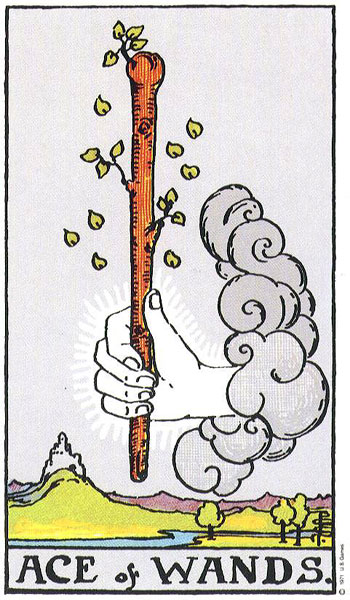

In [93]:
# Example usage
show_most_similar_card("The Fool", cleaned_df, cosine_sim)

In [38]:
cards_df['Image']

0     m00.jpg
1     m01.jpg
2     m02.jpg
3     m03.jpg
4     m04.jpg
       ...   
73    p10.jpg
74    p11.jpg
75    p12.jpg
76    p13.jpg
77    p14.jpg
Name: Image, Length: 78, dtype: object

In [66]:

from IPython.display import Image, display
import pandas as pd
import random


In [94]:
def display_card_image(card):
        image_path = f"cards/{card['Image']}"
        print(f"Behold the card: {card['Name']}")
        display(Image(filename=image_path))

In [95]:
def select_one_card_notebook(df):
    selected_card = df.sample(n=1).iloc[0]
    display_card_image(selected_card)

    return selected_card



In [96]:
def select_three_cards_notebook(df):
    selected_cards = df.sample(n=3)
    for _, card in selected_cards.iterrows():
        display_card_image(card)
        
    return selected_cards


Behold the card: Eight of Wands


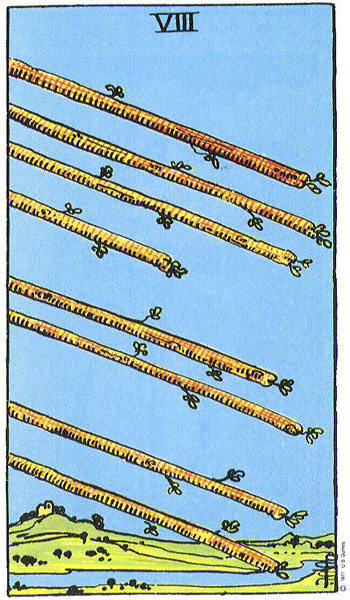

In [97]:
# Assuming cards_df is your DataFrame

# To select and display 1 card
selected_one_card = select_one_card_notebook(cards_df)




Behold the card: Five of Wands


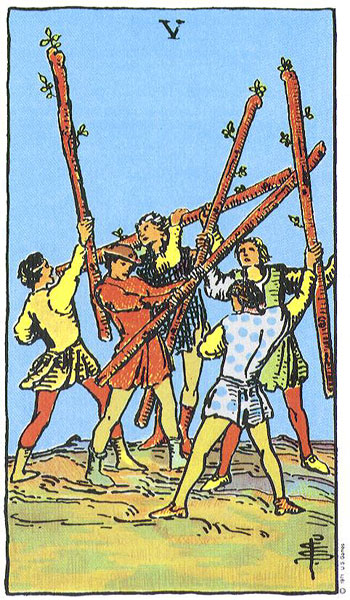

Behold the card: The World


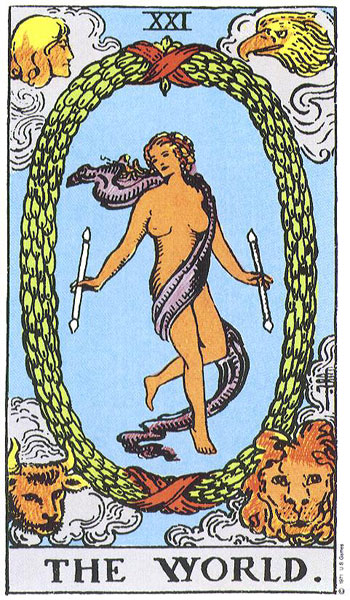

Behold the card: Five of Cups


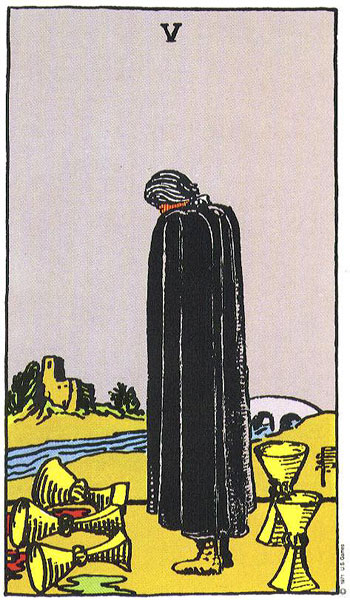

In [98]:
# To select and display 3 cards
selected_three_cards = select_three_cards_notebook(cards_df)

In [99]:
def display_card_details_notebook(card, period_label=''):
    if period_label:  # If a period label is provided (e.g., 'Past'), print it
        print(f"\n{period_label}\n")
    print(f"Name: {card['Name']}")
    print(f"Suit: {card['Suit']}")
    
    # Check if the field is already a list and join; otherwise, print directly
    fortune_telling = '; '.join(card['Fortune Telling']) if isinstance(card['Fortune Telling'], list) else card['Fortune Telling']
    keywords = '; '.join(card['Keywords']) if isinstance(card['Keywords'], list) else card['Keywords']
    meanings_light = '; '.join(card['Meanings Light']) if isinstance(card['Meanings Light'], list) else card['Meanings Light']
    meanings_shadow = '; '.join(card['Meanings Shadow']) if isinstance(card['Meanings Shadow'], list) else card['Meanings Shadow']
    questions_to_ask = '; '.join(card['Questions to Ask']) if isinstance(card['Questions to Ask'], list) else card['Questions to Ask']
    
    print(f"Fortune Telling: {fortune_telling}")
    print(f"Keywords: {keywords}")
    print(f"Meanings Light: {meanings_light}")
    print(f"Meanings Shadow: {meanings_shadow}")
    print(f"Questions to Ask: {questions_to_ask}")
    
    # Display image below the details
    image_path = f"cards/{card['Image']}"
    display(Image(filename=image_path))


In [112]:
# now i want more detail to present
def select_one_card_notebook(df):
    selected_card = df.sample(n=1).iloc[0]
    display_card_details_notebook(selected_card)

    # show similiar card
    print("\n The most similar card is: \n")
    show_most_similar_card(selected_card['Name'], cleaned_df, cosine_sim)




In [113]:
def select_three_cards_notebook(df):
    selected_cards = df.sample(n=3).reset_index(drop=True)
    periods = ['Past', 'Present', 'Future']
    
    for i, card in selected_cards.iterrows():
        display_card_details_notebook(card, periods[i])


    


Name: The World
Suit: Trump
Fortune Telling: Winning the lottery; Getting your heart's desire; Having everything you ever imagined having
Keywords: wholeness; integration; totality; completeness; fullness
Meanings Light: Having it all; Knowing and loving yourself as completely as possible; Seeing the interconnection of all things and people; Enhancing your perspective; Living life to its fullest; Understanding the meaning of life
Meanings Shadow: Allowing greed and envy to prevent you from enjoying what you do possess; Failing to see the larger design in ordinary events; Believing that everything that exists can be touched, counted, or measured; Failing to see the divine reflected in those around you
Questions to Ask: For me, what would having it all mean?; How aware am I of my own connectedness to the world around me?; What keeps me from having it all right now, today?


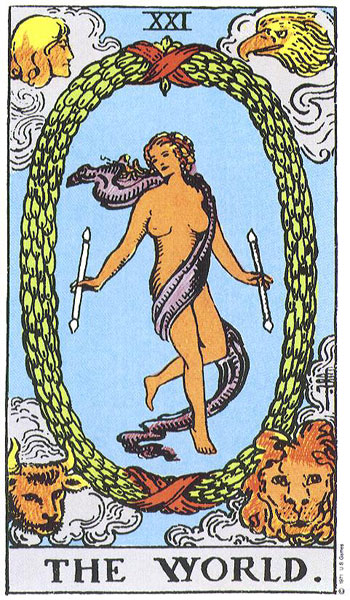


 The most similar card is: 

Most similar card to 'The World':
Name: Six of Swords


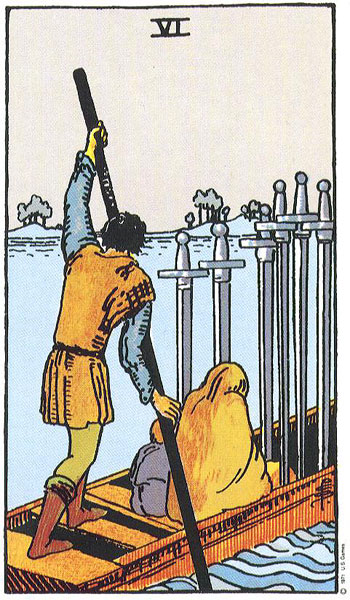

In [114]:
# To select and display 1 card
select_one_card_notebook(cards_df) 




Past

Name: Knight of Pentacles
Suit: Pentacles
Fortune Telling: A stingy person may chide you for spending money; Be prepared to defend an economic or sexual decision
Keywords: caution; focus; realism; invention
Meanings Light: Spending money wisely; Saving for a rainy day; Paying close attention to physical or financial details; Knowing where every dollar goes; Having safe sex; Preferring facts to "good feelings"; Finding creative ways to "make do" with resources on hand; Completing a new invention
Meanings Shadow: Throwing caution to the four winds; Spending without regard for consequence; Spending on luxury when necessities are lacking; Escaping stress by spending money; Obsessing on tiny physical or financial details; Perpetually chasing after some new bauble; Copying another's work and claiming it as your own
Questions to Ask: What's the difference between caution and fear?; How can I evaluate the practicality of my own ideas and methods?; How realistic are my goals?


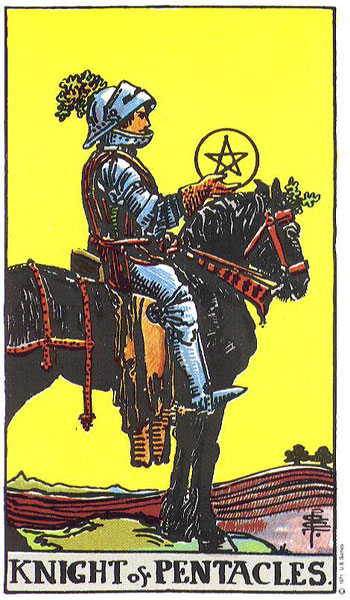


Present

Name: Three of Cups
Suit: Cups
Fortune Telling: Unconventional romance is coming your way: a love affair with someone you've always dismissed
Keywords: celebration; expression; community; friendliness
Meanings Light: Celebrating your feelings or connections with others; Expressing joy through song, dance, or physical affection; Working together with others who share your feelings; Performing acts of service as a way of saying, "I love you"; Embracing unconventional romantic arrangements
Meanings Shadow: Mistaking giddiness for true affection; Being dominated by manic emotions; Expecting everyone to always feel the same way you do; Demanding unreasonable support from friends or family; Partying to a dangerous or unhealthy extent
Questions to Ask: What's worth celebrating in my life?; How can I demonstrate my feelings in appropriate ways?; What can I do to show my partner how I really feel?


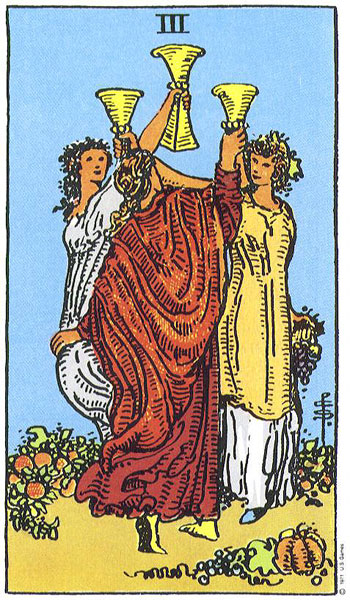


Future

Name: Nine of Pentacles
Suit: Pentacles
Fortune Telling: Until you appreciate what you have, you won't have any luck getting more
Keywords: training; discipline; confidence; enough
Meanings Light: Investing time in learning or teaching a difficult task; Restraining yourself from physical or financial extremes; Making sacrifices as a way of achieving larger goals; Breaking a complex task down into simple steps; Wanting what you have; Knowing the difference between needs and wants
Meanings Shadow: Being assigned to a task without being trained to perform it; Pursuing a position for which you are not qualified; Disregarding requirements; Refusing to dedicate adequate time or attention when learning about something or someone new; Always craving more
Questions to Ask: If you could not have what you want, how would you make do?; Could you make a complex task easier by breaking it down into smaller steps?; How patient are you during the learning process? With yourself? With others?


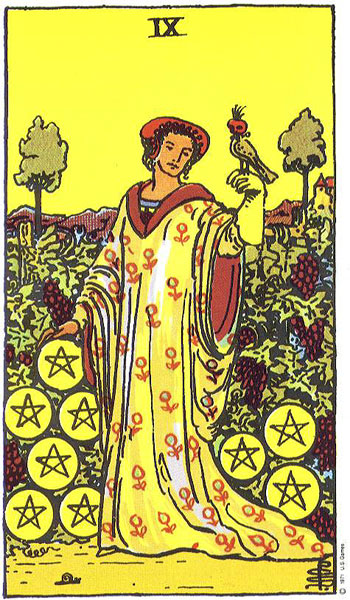

In [111]:
# To select and display 3 cards with 'Past', 'Present', 'Future' labels
select_three_cards_notebook(cards_df) 

# 1__________________________________summarize_____________________________________

In [116]:
# Since by far everything isgoing good. I should redifine the structure of the code to return the result that can be used in streamlit
# I will start by redefining the functions

# Import library

In [193]:
# For data manipulation
import pandas as pd

# For numerical operations
import numpy as np

# For TF-IDF vectorization and cosine similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For displaying images in Jupyter Notebook
from IPython.display import Image, display


# Load data

In [293]:
# Load the tarot card data from the JSON file
def load_tarot_data(json_file_path):
    with open(json_file_path, 'r') as file:
        return json.load(file)

# process data

In [294]:
# because in the past analysis we realize that we only need the cards without null values
def extract_card_details(card_dict):
    # Extracting all known fields from the card
    card_details = {
        'Name': card_dict['name'],
        'Number': card_dict['number'],
        'Arcana': card_dict['arcana'],
        'Suit': card_dict['suit'],
        'Image': card_dict['img'],
        'Fortune Telling': card_dict['fortune_telling'],
        'Keywords': card_dict['keywords'],
        'Meanings Light': card_dict['meanings']['light'],
        'Meanings Shadow': card_dict['meanings']['shadow'],
        'Questions to Ask': card_dict.get('Questions to Ask', [])
    }
    
    # Handling list fields to convert them into string for easier display/storage
    for key in ['Fortune Telling', 'Keywords', 'Meanings Light', 'Meanings Shadow', 'Questions to Ask']:
        if isinstance(card_details[key], list):
            card_details[key] = '; '.join(card_details[key])
    
    return card_details

In [295]:
def preprocess_data(json_data):
    card_list= json_data['cards']
    extracted_details = [extract_card_details(card) for card in card_list]
    cards_df = pd.DataFrame(extracted_details)
    return cards_df
    


# Get the random card

In [296]:
def select_one_card(df):
    selected_card = df.sample(n=1).reset_index(drop=True)
    selected_card['Period'] = ''
    return selected_card

In [297]:
def select_three_cards(df):
    selected_cards = df.sample(n=3).reset_index(drop=True)
    periods = ['Past', 'Present', 'Future']
    selected_cards['Period'] = periods
    
    return selected_cards

# Object-based recommendation system

In [298]:
# Concatenate your text columns into a single text column for vectorization
def get_sim_matrix(df):
    combined_text = df['Keywords'] + '; ' + df['Meanings Light'] + '; ' + df['Meanings Shadow'] + '; ' + df['Questions to Ask']

    # Vectorizing  Text Data
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(combined_text)
    # get similarity matrix
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim


# get simliar cards
def get_most_similar_card(card_name, df, cosine_sim_matrix):
    card_index = df[df['Name'] == card_name].index[0]
    sim_scores = cosine_sim_matrix[card_index]
    sim_scores[card_index] = -1  # Ignore self-similarity
    most_similar_index = np.argmax(sim_scores)
    most_similar_card = df.iloc[most_similar_index]
    most_similar_card=pd.DataFrame(most_similar_card).T
    most_similar_card.reset_index(drop=True, inplace=True)
    
    return most_similar_card

# Display card

In [299]:
def display_card_image(card):
        image_path = f"cards/{card['Image']}"
        print(f"Behold the card: {card['Name']}")
        display(Image(filename=image_path))

In [300]:
def display_three_cards(selected_cards):
    for _, card in selected_cards.iterrows():
        display_card_image(card)
        
    return selected_cards

In [308]:
def display_card_details_notebook(card, period_label=''):
    if period_label:  # If a period label is provided (e.g., 'Past'), print it
        print(f"\n{period_label}\n")
    
    # Extract the first element directly for each field to avoid printing Series with indices
    print(f"Name: {card['Name'].iloc[0]}")
    print(f"Suit: {card['Suit'].iloc[0]}")
    
    # Handling text fields that might be lists or strings
    fortune_telling = '; '.join(card['Fortune Telling']) if isinstance(card['Fortune Telling'].iloc[0], list) else card['Fortune Telling'].iloc[0]
    keywords = '; '.join(card['Keywords']) if isinstance(card['Keywords'].iloc[0], list) else card['Keywords'].iloc[0]
    meanings_light = '; '.join(card['Meanings Light']) if isinstance(card['Meanings Light'].iloc[0], list) else card['Meanings Light'].iloc[0]
    meanings_shadow = '; '.join(card['Meanings Shadow']) if isinstance(card['Meanings Shadow'].iloc[0], list) else card['Meanings Shadow'].iloc[0]
    questions_to_ask = '; '.join(card['Questions to Ask']) if isinstance(card['Questions to Ask'].iloc[0], list) else card['Questions to Ask'].iloc[0]
    
    print(f"Fortune Telling: {fortune_telling}")
    print(f"Keywords: {keywords}")
    print(f"Meanings Light: {meanings_light}")
    print(f"Meanings Shadow: {meanings_shadow}")
    print(f"Questions to Ask: {questions_to_ask}")
    
    # Display image below the details
    # Directly accessing the image filename as a string
    image_path = f"cards/{card['Image'].iloc[0]}"
    display(Image(filename=image_path))



# Test

In [302]:
file_paths='tarot-images.json'
data=load_tarot_data(file_paths)


In [303]:
dff=preprocess_data(data)
select_one_card=select_one_card(dff)
select_three_cards=select_three_cards(dff)
cosine_sim=get_sim_matrix(dff)


In [304]:
select_one_card

,Name,Number,Arcana,Suit,Image,Fortune Telling,Keywords,Meanings Light,Meanings Shadow,Questions to Ask,Period
0,Queen of Pentacles,13,Minor Arcana,Pentacles,p13.jpg,This card represents a woman with an expansive...,luxury; comfort; resourcefulness; generosity; ...,"Appreciating fine food, fine wine, beautiful a...",Indulging in gluttony or greediness; Becoming ...,How do I define luxury?; To what extent am I c...,


In [310]:
get_most_similiar_card=get_most_similar_card(select_one_card['Name'][0], dff, cosine_sim)


In [311]:
get_most_similiar_card

,Name,Number,Arcana,Suit,Image,Fortune Telling,Keywords,Meanings Light,Meanings Shadow,Questions to Ask
0,Nine of Cups,9,Minor Arcana,Cups,c09.jpg,"Whatever you want, you'll get it",satisfaction; sensuality; luxury; pleasure,Being delighted with your own achievements; Re...,Being smug; Satisfying yourself at the expense...,What is true happiness?; If I could have anyth...


The selected card for today you is: 

Name: Queen of Pentacles
Suit: Pentacles
Fortune Telling: This card represents a woman with an expansive, sensual nature, likely born between December 13th and 31st, who uses sensual appeal and the promise of reward to sway others to her point of view
Keywords: luxury; comfort; resourcefulness; generosity; prosperity
Meanings Light: Appreciating fine food, fine wine, beautiful art, beautiful bodies, or any of the better things in life; Reveling in healthy sexuality; Treating yourself; Splurging on the occasional "nice to have" item; Rewarding someone with compensation above and beyond expectations; Having it all
Meanings Shadow: Indulging in gluttony or greediness; Becoming insatiable; Blunting the impact of treats by indulging in them too often; Providing physical comfort without providing for emotional needs; Allowing a feeling of entitlement to distort your gratitude for what you're given
Questions to Ask: How do I define luxury?; To what extent

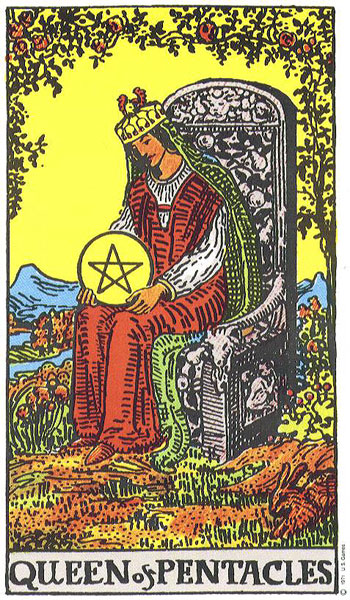


 The most similar card is: 

Name: Nine of Cups
Suit: Cups
Fortune Telling: Whatever you want, you'll get it
Keywords: satisfaction; sensuality; luxury; pleasure
Meanings Light: Being delighted with your own achievements; Recognizing your own talents and abilities; Reveling in the good things life has to offer; Indulging yourself; Relaxing and unwinding; Having everything you need in order to feel complete
Meanings Shadow: Being smug; Satisfying yourself at the expense of others; Being selfish; Over-indulging; Avoiding work that needs to be done; Claiming achievements or skills you do not possess; Never being satisfied, no matter how much you have
Questions to Ask: What is true happiness?; If I could have anything, what would I have?; What is my attitude toward luxury? Do I deserve it?


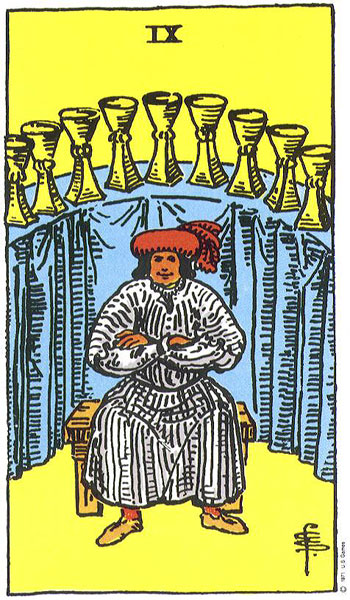

In [312]:
print("The selected card for today you is: \n")
display_card_details_notebook(select_one_card, period_label='')
print("\n The most similar card is: \n")

display_card_details_notebook(get_most_similiar_card)
